# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [95]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for nice looking plots
%matplotlib inline

### Step 2: Read in your data set 

In [10]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [11]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: There are 398 observations in the data set. 

#### Question 2. Create a summary table

In [23]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='admit ~ gre', data=df_raw).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     13.71
Date:                Sun, 02 Apr 2017   Prob (F-statistic):           0.000244
Time:                        14:28:23   Log-Likelihood:                -254.17
No. Observations:                 398   AIC:                             512.3
Df Residuals:                     396   BIC:                             520.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1151      0.120     -0.963      0.336        -0.350     0.120
gre            0.0007      0.000      3.703      0.000         0.000     0.001
==============================================================================
Omnibus:                      659.340   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.243
Skew:                           0.732   Prob(JB):                     1.12e-14
Kurtosis:                       1.685   Cond. No.                     3.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
#formula notification is the equivalent to writing out our models such that 'outcome = predictor'
#with the follwing syntax formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
lm = smf.ols(formula='admit ~ gpa', data=df_raw).fit()

#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.65
Date:                Mon, 03 Apr 2017   Prob (F-statistic):           0.000421
Time:                        10:46:45   Log-Likelihood:                -253.85
No. Observations:                 398   AIC:                             511.7
Df Residuals:                     396   BIC:                             519.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4135      0.207     -2.002      0.046        -0.819    -0.007
gpa            0.2153      0.061      3.557      0.000         0.096     0.334
==============================================================================
Omnibus:                      527.016   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.218
Skew:                           0.752   Prob(JB):                     6.89e-15
Kurtosis:                       1.708   Cond. No.                         33.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because GPA is on a 4 point scale  but GRE is on a higher scale. 

#### Question 4. Drop data points with missing data


In [106]:
df_raw.drop() ??????????

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [51]:
df_raw.count() <- Ideally they'd all say 398'

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 6. Create box plots for GRE and GPA

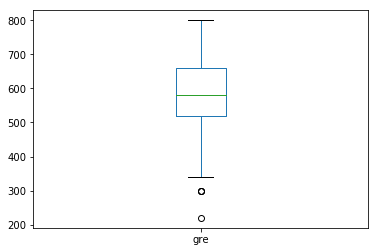

In [30]:
df_raw['gre'].plot(kind='box')

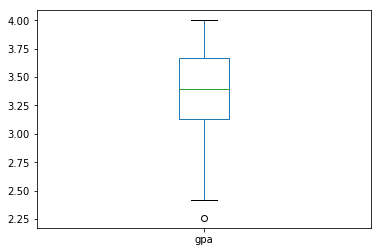

In [31]:
df_raw['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: gre has higher kurtosis but more outliers. GPA is skewed more toward 4.0 but seems more evenly distributed.

#### Question 8. Describe each distribution 

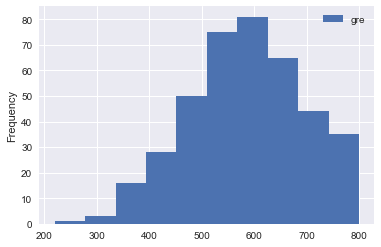

In [82]:
data = df_raw.gre
df = pd.DataFrame(data)
df.plot(kind='hist')

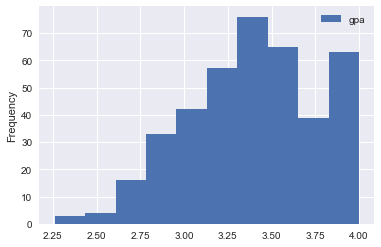

In [83]:
data = df_raw.gpa
df = pd.DataFrame(data)
df.plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: It would for GRE but not for GPA. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes the distribution for GPA would need corrected because it doesn't follow a normal distribution. 

#### Question 11. Which of our variables are potentially colinear? 

               gre       gpa  prestige
gre       1.000000  0.382408 -0.124533
gpa       0.382408  1.000000 -0.059031
prestige -0.124533 -0.059031  1.000000
Axes(0.125,0.125;0.62x0.755)


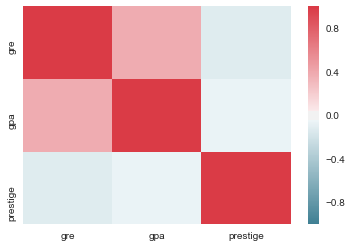

In [98]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_raw[['gre', 'gpa', 'prestige']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

#### Question 12. What did you find?

Answer: There's a positive colinearity between GRE and GPA. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I'd break the sample in two: one where prestige = 0 and the other sample having prestige = 1. Then I'd do the same exploratory analysis as above with each group and observe differences in the means & STDEVs of each variable (GPA and GRE)

#### Question 14. What is your hypothesis? 

Answer: Admission decisions are unaffected by prestige. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data